<center><h1 style="color:red;">Hawthorne Effect and Other Factors Contributing to the Performance of NFL Quarterbacks Using NFL Data</h1></center>

### Alex Szczepanski, Anthony Woods, Noam Rothner, and Tyler D'Amato
#### Group #7
<center><h4 style="color:green;"> Programming for Business Analytics Presentation</h4></center>


**Date:** December 7, 2023

**Affiliation:** Binghamton University, School of Management, NY, USA


## Agenda

1. Introduction
   
2. Problem Statement

   
3. Project Objectives

   
4. Results & Discussions

   
5. Conclusions

6. Q+A

## Let's Begin!


# The Hawthorne Effect and 'Choking under Pressure' in Competitive Sports
- High-stakes dynamics in competitive sports
    - Impact of the Hawthorne Effect on athletes' psychological states.
    - Phenomenon of "choking under pressure."
    - Study Focus: External Observation, Psychological Responses, and Performance Outcomes

    - Exploration of the interplay between external observation and internal psychological responses.
##
    - Identification of variables: attendance, viewership, salary, temperature, wind, and game implications.
        - Explanation of each of the variables:
            - (1) weekly_attendance - integer variable
            - (2) Season - string type dummy variable
            - (3) Salary - integer variable
            - (4) weather temp - float type
            - (5) wind MPH - float type variable
            - (6) Primetime - string type dummy variable
            - (7) Home or Away - string type dummy variable

    - Notable instances illustrating pressure-induced failure in sports, e.g., Gary Anderson and Tony Romo. Talk about instances
##
- NFL Offensive Output Trend
    - Average of 22.84 points per NFL team per game over the past 5 years.
    - Ongoing season: Lowest-scoring collective offenses in the last decade.
    - Primetime games consistently falling below projected totals (over 62.5%).
##
- Quarterback Stats Analysis
    - Quarterback stats over the past 5 years: Josh Allen (2.4 Passing TDs, 256.7 yards per game), Aaron Rodgers (2.3 Passing TDs, 237.3 yards per game), Patrick Mahomes (2.1 Passing TDs, 282.8 yards per game).
    - Emphasis on maintaining a competitive edge in high-pressure situations.
    - Examining how athletes cope when facing heightened scrutiny during pivotal moments.
##
- Total Quarterback Rating (QBR)
    - Definition: Measures a quarterback’s contributions to winning based on passes, rushes, turnovers, touchdowns, sacks, and penalties.
    - Noteworthy for its play-by-play metrics, providing a nuanced evaluation of personal success or efficiency.
    - Differentiating plays based on contextual significance.
    - Scale: 0 to 100, with 50 representing the average performance.



### Problem Statement: 
Our group seeks to use the concept of the Hawthorne effect to measure NFL quarterback performance.  Our next steps include identifying all potential outside factors, like salary and team standings.  Data like total quarterback performance, temperature, time, and wind speed of the game will also be incorporated.  Weekly attendance and salary will also play a role.  By examining pre-existing NFL data and variables in other similar settings, we can further develop our theory and understanding of the significance these factors play on quarterback performance. 


### Project Objectives
#### Objective #1: 
Define and evaluate the Hawthorne effect within NFL quarterbacks, using the comprehensive data from various performances.

#### Objective #2: 

Understand other factors along attendance that may manipulate NFl player performance factors using a linear regression model.

#### Objective #3: 
Isolate and measure other factors which play a role in the productivity of NFL athletes, besides the Hawthorne effect.

   - Analyze the significance of each variable 
       - Use a parsimonious linear regression model to determine which variables have the greatest R value (greatest correlation to performance)
       - Establishes a line of best fit
       - Describe the relationship between variables 
       - Forecast future quarterback performances to determine whether or not they are worth their salaries?


### Results and Discussions

#### The data used in this analysis was cleaned [here](./Master_Dataset_2.ipynb)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from  sklearn.linear_model  import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statistics as stat
import math
import sklearn.metrics

In [3]:
stats_all =  pd.read_csv(r'Final_Data_Skills_Players.csv')

In [4]:
stats_all = stats_all.drop('Unnamed: 0', axis = 1)

In [5]:
stats_all.columns

Index(['Player Id', 'Name', 'Year', 'Season', 'Home or Away', 'Week',
       'Outcome', 'Total Yards', 'Total TDs', 'Opponent', 'Team', 'Time',
       'Thursday Game', 'Home Team', 'Primetime', 'Game Date', 'Away Team',
       'Weather Temp', 'Weather MPH', 'Attendance', 'Salary', 'Cap Percentage',
       'Weight (lbs)', 'Height (inches)'],
      dtype='object')

In [6]:
stats_all = stats_all[['Season', 'Thursday Game','Home or Away', 'Outcome', 'Total Yards', 'Total TDs', 'Primetime', 'Weather Temp', 'Weather MPH', 'Attendance', 'Salary', 'Weight (lbs)','Height (inches)']]

In [7]:
stats_all

,Season,Thursday Game,Home or Away,Outcome,Total Yards,Total TDs,Primetime,Weather Temp,Weather MPH,Attendance,Salary,Weight (lbs),Height (inches)
0,0,0,1,W,0.0,0.0,0,87.0,2.0,71933.0,675146.0,230.0,76.0
1,0,0,1,W,0.0,0.0,0,87.0,2.0,71933.0,1737500.0,230.0,76.0
2,0,0,1,W,245.0,2.0,0,87.0,2.0,71933.0,12000000.0,235.0,80.0
3,0,0,1,W,2.0,0.0,0,87.0,2.0,71933.0,619670.0,255.0,73.0
4,0,0,1,W,117.0,0.0,0,87.0,2.0,71933.0,5500000.0,220.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18450,0,0,0,L,28.0,0.0,0,53.0,6.0,69596.0,2241396.0,191.0,70.0
18451,0,0,1,W,59.0,0.0,0,53.0,6.0,69596.0,5468750.0,198.0,72.0
18452,0,0,1,W,0.0,0.0,0,53.0,6.0,69596.0,570000.0,184.0,72.0
18453,0,0,1,W,48.0,0.0,0,53.0,6.0,69596.0,4075000.0,255.0,76.0


In [8]:
stats_qb =  pd.read_csv(r'Final_Data_qbs.csv')


In [9]:
stats_qb = stats_qb.drop('Unnamed: 0', axis = 1)

In [10]:
stats_qb = stats_qb[['Season','Thursday Game', 'Home or Away', 'Outcome', 'Total Yards', 'Total TDs', 'Primetime', 'Weather Temp', 'Weather MPH', 'Attendance', 'Salary', 'Weight (lbs)','Height (inches)','Ints','Passer Rating', 'QBR']]

In [11]:
stats_qb

,Season,Thursday Game,Home or Away,Outcome,Total Yards,Total TDs,Primetime,Weather Temp,Weather MPH,Attendance,Salary,Weight (lbs),Height (inches),Ints,Passer Rating,QBR
0,0.0,0.0,0.0,W,212.0,2.0,0,72.0,0.0,91174.0,3767444.0,230.0,76.0,0,125.5,95.3
1,0.0,0.0,1.0,W,348.0,3.0,1,72.0,0.0,64401.0,15820000.0,226.0,75.0,0,125.3,93.1
2,0.0,0.0,0.0,L,163.0,1.0,1,72.0,0.0,64401.0,20400000.0,218.0,76.0,2,53.0,39.6
3,0.0,0.0,1.0,W,266.0,3.0,1,70.0,6.0,76939.0,17500000.0,230.0,77.0,0,111.9,90.0
4,0.0,0.0,0.0,L,389.0,3.0,1,70.0,6.0,76939.0,6029454.0,240.0,76.0,2,83.1,46.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,1.0,0.0,1.0,W,415.0,5.0,1,72.0,0.0,71127.0,23750000.0,217.0,76.0,0,139.4,97.2
1393,1.0,0.0,0.0,L,333.0,3.0,1,72.0,0.0,71127.0,19250000.0,225.0,74.0,1,91.6,86.1
1394,1.0,0.0,1.0,W,383.0,3.0,1,41.0,10.0,66829.0,13764705.0,225.0,76.0,0,127.5,89.6
1395,1.0,0.0,1.0,L,284.0,2.0,1,72.0,0.0,70807.0,23750000.0,217.0,76.0,0,144.1,81.0


In [12]:
#function to check for correlation 
def scatterplot(x,y, x_lab, y_lab):
    plt.scatter(x, y)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.show()

In [13]:
#function to get the model
def models(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    x_train2 = sm.add_constant(x_train)
    reg = sm.OLS(y_train, x_train2)
    reg1 = reg.fit()
    print(reg1.summary())
    y_pred_train = lr.predict(x_train)
    plt.scatter(y_train, y_pred_train)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()
    mse = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
    rmse = math.sqrt(mse)
    print("RMSE =", rmse)
    


In [14]:
#function to test for correlation between the independent variables
def multiocollinearity(x):
  vif_data = pd.DataFrame()
  vif_data["feature"] = x.columns
  vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

  print(vif_data)

In [15]:
stats_qb_2 = stats_qb.drop('Outcome', axis = 1)
stats_qb_2.corr(method = 'pearson')

,Season,Thursday Game,Home or Away,Total Yards,Total TDs,Primetime,Weather Temp,Weather MPH,Attendance,Salary,Weight (lbs),Height (inches),Ints,Passer Rating,QBR
Season,1.000000,-0.054992,-0.003826,0.024554,0.015079,0.358340,-0.126942,0.054425,0.065572,0.072298,0.050031,0.018446,0.048316,-0.033168,0.021491
Thursday Game,-0.054992,1.000000,0.005465,-0.065679,-0.014740,0.427967,0.016149,-0.068324,0.010338,-0.018728,-0.013800,-0.035653,-0.055819,0.012562,0.026156
Home or Away,-0.003826,0.005465,1.000000,0.056635,0.076689,-0.007090,0.015499,-0.000973,-0.006000,-0.011614,-0.016241,-0.001804,-0.006040,0.090292,0.016624
Total Yards,0.024554,-0.065679,0.056635,1.000000,0.487610,0.018177,0.058274,-0.119326,0.001818,0.245244,-0.000005,-0.033114,-0.003130,0.435062,0.392873
Total TDs,0.015079,-0.014740,0.076689,0.487610,1.000000,0.024771,0.018586,-0.048728,-0.003557,0.164469,0.015992,-0.023566,-0.131417,0.678958,0.548274
Primetime,0.358340,0.427967,-0.007090,0.018177,0.024771,1.000000,-0.179785,-0.125534,0.170510,0.075379,0.021483,-0.018557,-0.006457,0.006746,0.034589
Weather Temp,-0.126942,0.016149,0.015499,0.058274,0.018586,-0.179785,1.000000,-0.164188,-0.115638,-0.015040,0.025040,0.057964,-0.009563,0.057518,0.047077
Weather MPH,0.054425,-0.068324,-0.000973,-0.119326,-0.048728,-0.125534,-0.164188,1.000000,-0.034498,-0.120354,-0.051726,0.005411,0.025206,-0.083909,-0.086243
Attendance,0.065572,0.010338,-0.006000,0.001818,-0.003557,0.170510,-0.115638,-0.034498,1.000000,0.088488,-0.072613,-0.057946,-0.024887,-0.013026,-0.009374
Salary,0.072298,-0.018728,-0.011614,0.245244,0.164469,0.075379,-0.015040,-0.120354,0.088488,1.000000,0.089811,0.109706,-0.018153,0.157336,0.169916


In [16]:
stats_all_2 = stats_all.drop('Outcome', axis = 1)
stats_all_2.corr(method = 'pearson')

,Season,Thursday Game,Home or Away,Total Yards,Total TDs,Primetime,Weather Temp,Weather MPH,Attendance,Salary,Weight (lbs),Height (inches)
Season,1.000000,-0.059276,0.003250,-0.005003,-0.000391,0.390903,-0.168265,0.071569,0.068915,0.001399,0.004765,-0.005868
Thursday Game,-0.059276,1.000000,0.003753,-0.006678,-0.000168,0.393221,0.016762,-0.078493,0.012664,0.003511,0.001382,0.000432
Home or Away,0.003250,0.003753,1.000000,0.008683,0.025439,0.005214,0.006605,0.000772,-0.009096,-0.000282,0.000546,0.000276
Total Yards,-0.005003,-0.006678,0.008683,1.000000,0.718099,0.002756,0.012091,-0.008642,0.002629,0.593118,-0.034145,0.088972
Total TDs,-0.000391,-0.000168,0.025439,0.718099,1.000000,0.012009,0.010175,-0.008165,0.000925,0.438375,0.001124,0.081329
Primetime,0.390903,0.393221,0.005214,0.002756,0.012009,1.000000,-0.191455,-0.124329,0.166323,0.015300,0.002790,-0.002781
Weather Temp,-0.168265,0.016762,0.006605,0.012091,0.010175,-0.191455,1.000000,-0.176205,-0.093272,0.007312,0.004837,0.013558
Weather MPH,0.071569,-0.078493,0.000772,-0.008642,-0.008165,-0.124329,-0.176205,1.000000,-0.053591,-0.018234,0.003510,0.000700
Attendance,0.068915,0.012664,-0.009096,0.002629,0.000925,0.166323,-0.093272,-0.053591,1.000000,0.013570,-0.011712,-0.026260
Salary,0.001399,0.003511,-0.000282,0.593118,0.438375,0.015300,0.007312,-0.018234,0.013570,1.000000,0.025888,0.154268


         feature        VIF
0         Season   1.290588
1   Home or Away   1.983490
2      Primetime   2.139617
3         Salary   2.921998
4     Attendance  18.775325
5   Weather Temp  13.380704
6    Weather MPH   2.302975
7  Thursday Game   1.420066
                            OLS Regression Results                            
Dep. Variable:                    QBR   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     4.838
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           7.32e-06
Time:                        17:22:16   Log-Likelihood:                -4507.6
No. Observations:                 977   AIC:                             9033.
Df Residuals:                     968   BIC:                             9077.
Df Model:                           8                                         
Covariance Type:            nonrobust

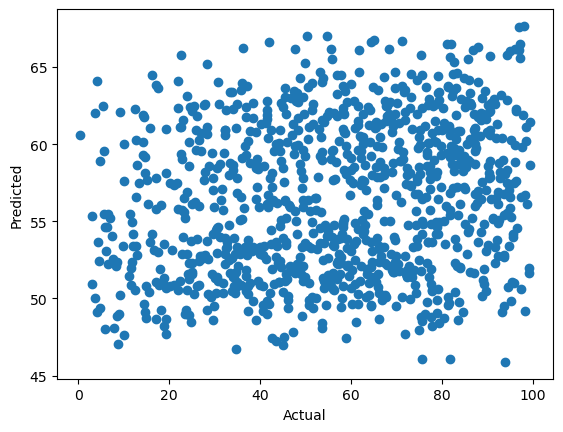

RMSE = 24.403628613414266


In [17]:
#Model using the QBR as the dependent production variable
x = stats_qb[['Season', 'Home or Away', 'Primetime', 'Salary','Attendance', 'Weather Temp', 'Weather MPH','Thursday Game']]
y = stats_qb['QBR']
multiocollinearity(x)
models(x, y)

### Graph 1 Findings
This graph shows that the model does not predict the QBR for quarterback per game well

         feature       VIF
0         Season  1.281518
1   Home or Away  1.653929
2      Primetime  1.913843
3         Salary  1.845161
4    Weather MPH  1.610069
5  Thursday Game  1.401580
                            OLS Regression Results                            
Dep. Variable:                    QBR   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.938
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           4.19e-06
Time:                        17:22:18   Log-Likelihood:                -4509.1
No. Observations:                 977   AIC:                             9032.
Df Residuals:                     970   BIC:                             9066.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    c

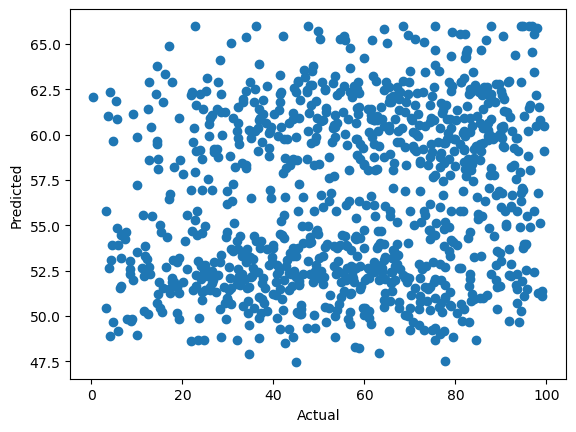

RMSE = 24.441860383531772


In [18]:
x_2 = stats_qb[['Season', 'Home or Away', 'Primetime', 'Salary', 'Weather MPH','Thursday Game']]
y_2 = stats_qb['QBR']
multiocollinearity(x_2)
models(x_2, y_2)

                            OLS Regression Results                            
Dep. Variable:                    QBR   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     33.06
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.20e-08
Time:                        18:28:13   Log-Likelihood:                -4510.4
No. Observations:                 977   AIC:                             9025.
Df Residuals:                     975   BIC:                             9035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.3488      1.325     37.991      0.0

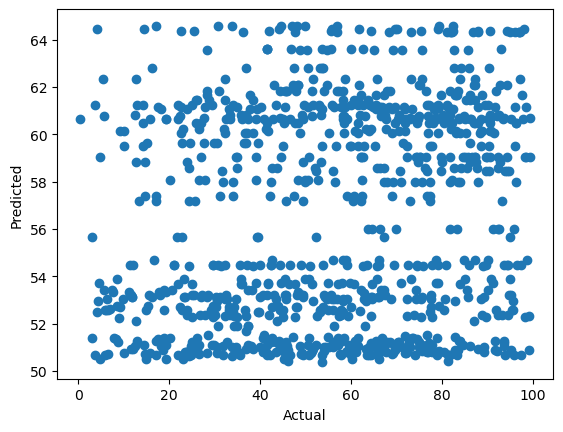

RMSE = 24.475249516151305


In [20]:
x_2 = stats_qb[['Salary']]
y_2 = stats_qb['QBR']

models(x_2, y_2)

### Graph 2 Findings
Shows that even with a better model according to the p-value of the variable, the model is predictive of QBR

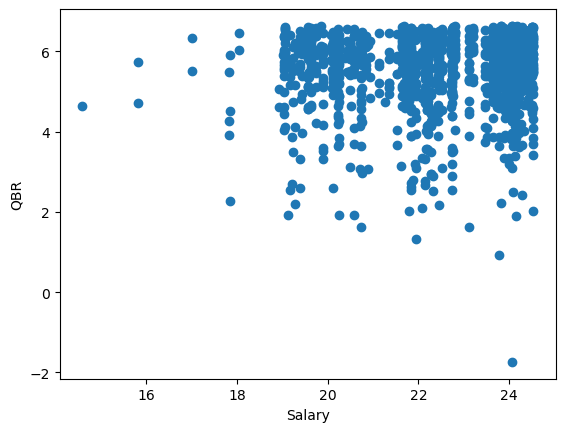

                            OLS Regression Results                            
Dep. Variable:                    QBR   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     17.86
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.61e-05
Time:                        15:17:21   Log-Likelihood:                -1312.4
No. Observations:                 977   AIC:                             2629.
Df Residuals:                     975   BIC:                             2639.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9597      0.390     10.162      0.0

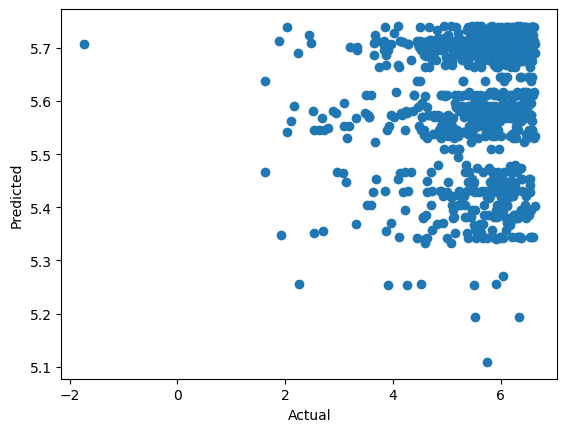

RMSE = 0.9271292014474783


In [37]:
x_salary = np.log2(stats_qb[['Salary']])
y_qbr = np.log2(stats_qb['QBR'])
scatterplot(x_salary, y_qbr, 'Salary', 'QBR')
models(x_salary, y_qbr)

### Graph 3 Findings
Shows the relationship between log(Salary) and log(QBR) to obtain a better distribution of the data, resulting in a weak correlation

         feature       VIF
0           Ints  1.404641
1  Passer Rating  3.327572
2        Outcome  2.697110
                            OLS Regression Results                            
Dep. Variable:                    QBR   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     385.0
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          8.45e-165
Time:                        15:28:06   Log-Likelihood:                -4144.4
No. Observations:                 977   AIC:                             8297.
Df Residuals:                     973   BIC:                             8316.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------

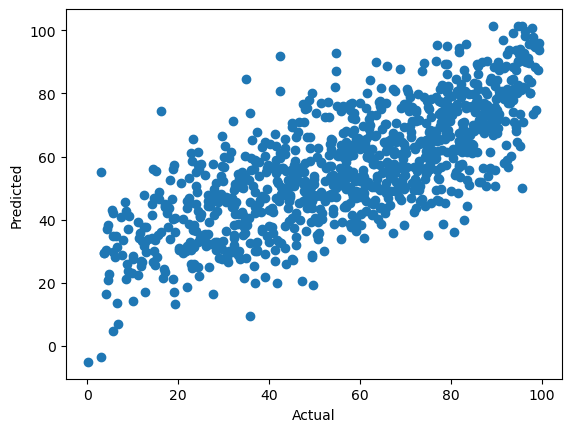

RMSE = 16.82839314820014


In [46]:
stats_qb['Outcome'] = stats_qb['Outcome'].replace({'W':1, 'L':0,'T':0})
x_3 = stats_qb[[  'Ints','Passer Rating', 'Outcome']]
y_3 = stats_qb['QBR']
multiocollinearity(x_3)
models(x_3, y_3)

In [47]:
x_big = stats_all[['Season', 'Home or Away', 'Primetime', 'Salary','Attendance', 'Weather Temp', 'Weather MPH','Thursday Game']]

In [48]:
y_big = stats_all['Total Yards']

                            OLS Regression Results                            
Dep. Variable:            Total Yards   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     902.9
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:29:06   Log-Likelihood:                -71421.
No. Observations:               12918   AIC:                         1.429e+05
Df Residuals:                   12909   BIC:                         1.429e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.3939      5.294      3.097

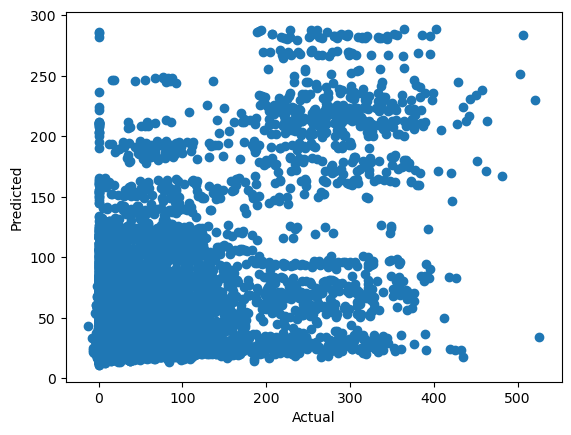

RMSE = 60.937372822662134
         feature        VIF
0         Season   1.348534
1   Home or Away   1.980609
2      Primetime   2.127774
3         Salary   1.422219
4     Attendance  16.433058
5   Weather Temp  12.539680
6    Weather MPH   2.246205
7  Thursday Game   1.364770


In [49]:
models(x_big, y_big)
multiocollinearity(x_big)

                            OLS Regression Results                            
Dep. Variable:            Total Yards   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     1203.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:31:08   Log-Likelihood:                -71422.
No. Observations:               12918   AIC:                         1.429e+05
Df Residuals:                   12911   BIC:                         1.429e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.3178      1.099     13.024

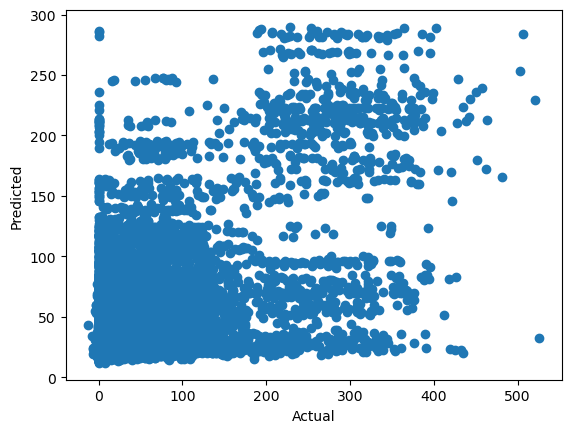

RMSE = 60.94482029151947
         feature       VIF
0         Season  1.338319
1   Home or Away  1.527517
2      Primetime  1.835604
3         Salary  1.276424
4    Weather MPH  1.500659
5  Thursday Game  1.351685


In [51]:
x_big2 = stats_all[['Season', 'Home or Away', 'Primetime', 'Salary',  'Weather MPH','Thursday Game']]
y_big2 = stats_all['Total Yards']
models(x_big2, y_big2)
multiocollinearity(x_big2)

### Graph 4 Findings
You can see from this graph that there is more predictive accuracy than the other models

                            OLS Regression Results                            
Dep. Variable:            Total Yards   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     3608.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:52:12   Log-Likelihood:                -71424.
No. Observations:               12918   AIC:                         1.429e+05
Df Residuals:                   12915   BIC:                         1.429e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.8046      0.838     17.672   

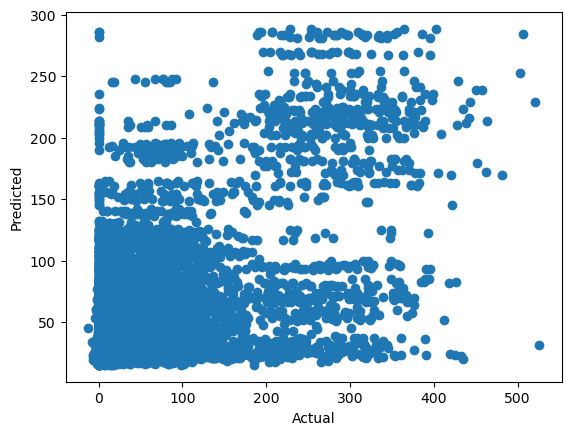

RMSE = 60.95358914945424
        feature       VIF
0        Salary  1.175556
1  Home or Away  1.175556


In [70]:

x_big2 = stats_all[['Salary', 'Home or Away']]
y_big2 = stats_all[['Total Yards']]
models(x_big2, y_big2)
multiocollinearity(x_big2)


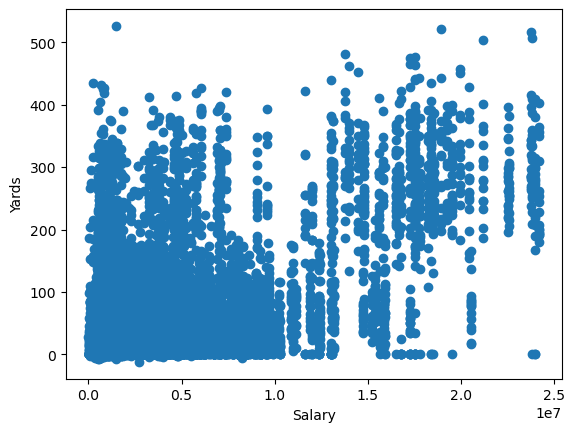

In [46]:
x_big_2 = stats_all['Salary']
scatterplot(x_big_2, y_big, 'Salary', 'Yards')

### Graph 5 Findings
This graph shows the relationship between between log(Salary) and log(yards) resulting in a weak relationship

### Results and Findings
Salary and home field advantage were statistically significant variables with p-values of 0.000 and 0.039. However the home or away variable was only significant in the larger model, indicating that this variable is either most significant amongst non-quarterback positions or that our original data set’s sample size was not large enough. 

### Conclusion

Overall, it is clear from our graphs that our data did not yield the significant findings we anticipated.  However, there still were some correlations, such as total yards and touchdowns with home field advantage.  Salary is also a point of significance, and our findings show there is a lack of research on the topic in this specific environment.  Since QBR is a combination of “what is expected of the next play,” it may not be a sustainable measure to base our effect on.  Due to the fact that quarterback performance is measured by a plethora of variables, other performance statistics are needed in order to accurately identify the true variables behind our experiment.  There is also further potential research for the Hawthorne effect and our listed factors in other generalizable settings, without the bias of QBR at play. While it is clear salary and some other factors, like home field advantage, have some sort of effect, in contradiction to our hypothesis it seems that attendance does not affect performance.  


### Thank You! Any Questions?